In [1]:
import sys
import os
from pathlib import Path
from glob import glob

In [2]:
sys.path.append('..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [4]:
from experiments.eval_features import eval_features

In [5]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
PATH_RESULTS = os.path.join(PATH_ROOT, 'results', 'exp643896')
PATH_OUTPUT = os.path.join(PATH_RESULTS, 'roc')

print(PATH_RESULTS)

/home/lukec/workspace/baard_v4/results/exp643896


In [6]:
PATH_OUTPUT = os.path.join(PATH_RESULTS, 'roc')

if not os.path.exists(PATH_OUTPUT):
    print(f'Create {PATH_OUTPUT}')
    os.makedirs(PATH_OUTPUT)

In [7]:
K_LIST = np.concatenate([np.arange(3, 10, 1), np.arange(10, 100, 5), np.arange(10, 201, 10)])

In [8]:
def eval_k(detector_name,
           data_name='MNIST',
           attack_name='APGD-inf',
           eps='0.22',
           path_output=PATH_OUTPUT,
           k_list=K_LIST):
    path_input = os.path.join(PATH_RESULTS, data_name, detector_name, attack_name)

    _detector_name = detector_name.split('_')[0]
    files_adv = [f'{_detector_name}-{k}-{data_name}-{attack_name}-{eps}.pt' for k in k_list]
    files_clean = [f'{_detector_name}-{k}-{data_name}-{attack_name}-clean.pt' for k in k_list]

    df_auc_all = pd.DataFrame()
    for file_clean, file_adv in zip(files_clean, files_adv):
        _, df_auc_tpr = eval_features(path_input, path_output, file_clean, file_adv)
        df_auc_all = pd.concat([df_auc_all, df_auc_tpr], ignore_index=True)
    df_auc_all['k'] = k_list

    df_sn_plot = df_auc_all.melt('k', var_name='cols', value_name='rate')
    sn.lineplot(data=df_sn_plot.query(('cols == "auc" | cols == "5fpr"')), x='k', y='rate', hue='cols')


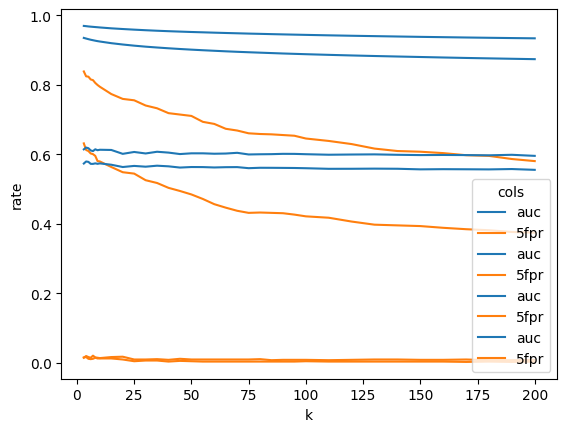

In [9]:
detector_name = 'ReliabilityStage_tuneK'
eval_k(detector_name, 'MNIST', 'APGD-inf', eps='0.22')
eval_k(detector_name, 'MNIST', 'APGD-2', eps='4.0')
eval_k(detector_name, 'CIFAR10', 'APGD-inf', eps='0.01')
eval_k(detector_name, 'CIFAR10', 'APGD-2', eps='0.3')

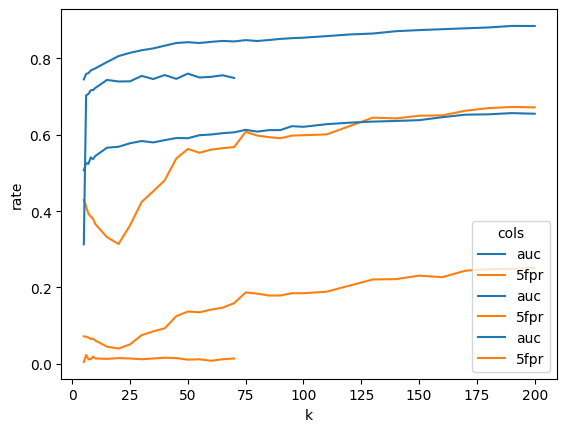

In [10]:
k_list = np.concatenate([np.arange(5, 10, 1), np.arange(10, 100, 5), np.arange(10, 201, 10)])
detector_name = 'DecidabilityStage_tuneK'
eval_k(detector_name, 'MNIST', 'APGD-inf', eps='0.22', k_list=k_list)
eval_k(detector_name, 'MNIST', 'APGD-2', eps='4.0', k_list=k_list)
eval_k(detector_name, 'CIFAR10', 'APGD-inf', eps='0.01', k_list=np.concatenate([np.arange(5, 10, 1), np.arange(10, 75, 5)]))
# eval_k(detector_name, 'CIFAR10', 'APGD-2', eps='0.3')
